# NAIVE BAYE'S CLASSIFIER

Neccessary Library Importing

In [130]:
# Initial Neccessary Libraries.
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Libraries for handling/eliminating stopworads.
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from posixpath import join
import math
import random

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Merging of two files.

In [131]:
# Importing train_data.csv
# Reference: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
from google.colab import files
upload_one = files.upload()

Saving train_data.csv to train_data (3).csv


In [133]:
# Here we are reading the CSV file we just imported.
# Reference: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(upload_one['train_data.csv']))
print(df)

       Unnamed: 0  Sentence_id  \
0               0  GERRES15609   
1               1  PHERES15784   
2               2  GERREQ10457   
3               3  GERSKL27235   
4               4  HONSSK18415   
...           ...          ...   
60110       60110  UAERES18030   
60111       60111   GERRES3026   
60112       60112   INDSSK5492   
60113       60113  PHESSK15092   
60114       60114   HONEDU1643   

                                            New_Sentence            Type  
0      Author and/or Review architecture/design and o...  Responsibility  
1      Should be able to develop custom dynamic shape...  Responsibility  
2      Experience in working crosslly with a  larger ...     Requirement  
3      Previous business experience, including but no...           Skill  
4             Delivering fast and right the first  time.       SoftSkill  
...                                                  ...             ...  
60110  In this position, you will  utilize your progr...  Responsi

In [134]:
# Importing test_data.csv
# Reference: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
from google.colab import files
upload_two = files.upload()

Saving test_data.csv to test_data (3).csv


In [135]:
# Here we are reading the CSV file we just imported.
# Reference: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
import pandas as pd
import io
df1 = pd.read_csv(io.BytesIO(upload_two['test_data.csv']))
print(df1)

       Unnamed: 0  Sentence_id  \
0               0  UAERES16346   
1               1  COGREQ15586   
2               2  UAEREQ12722   
3               3  COGSKL29155   
4               4  PHERES12551   
...           ...          ...   
15024       15024  HONEXP17084   
15025       15025  UAESSK45553   
15026       15026  GERSSK14317   
15027       15027   PHEREQ4980   
15028       15028   PHESKL2893   

                                            New_Sentence  
0      Collaborate across all of DB&T practices and o...  
1      Strong  technology expertise in Identity and A...  
2           Strong knowledge on Service  Virtualization.  
3      Architect scalable data processing and analyti...  
4      Map client organization, build outstanding rel...  
...                                                  ...  
15024  A minimum of 3 years of experience in Industri...  
15025  Track record of managing multiple projects wit...  
15026  In addition, the candidate should have effecti...  
1

In [136]:
# Here we have merged the train and test dataset.
# Reference: https://colab.research.google.com/drive/1LYMAB4c_BmUCpvC_ZkHdYJBODseR6u19#scrollTo=gQp0mPImnn5V
df_merged = pd.merge(df, df1, how='outer')
df_merged

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill
...,...,...,...,...
75139,15024,HONEXP17084,A minimum of 3 years of experience in Industri...,NaN
75140,15025,UAESSK45553,Track record of managing multiple projects wit...,NaN
75141,15026,GERSSK14317,"In addition, the candidate should have effecti...",NaN
75142,15027,PHEREQ4980,Candidate should have sufficient knowledge on ...,NaN


In [137]:
df_merged.head(5)

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill


Here we have null values only in New_Sentence and Type, and in rest we don't have any null values. We can handle null values by laplace smooting.

In [138]:
df_merged.isna().sum()

Unnamed: 0          0
Sentence_id         0
New_Sentence     1394
Type            15029
dtype: int64

In [139]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75144 entries, 0 to 75143
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    75144 non-null  int64 
 1   Sentence_id   75144 non-null  object
 2   New_Sentence  73750 non-null  object
 3   Type          60115 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


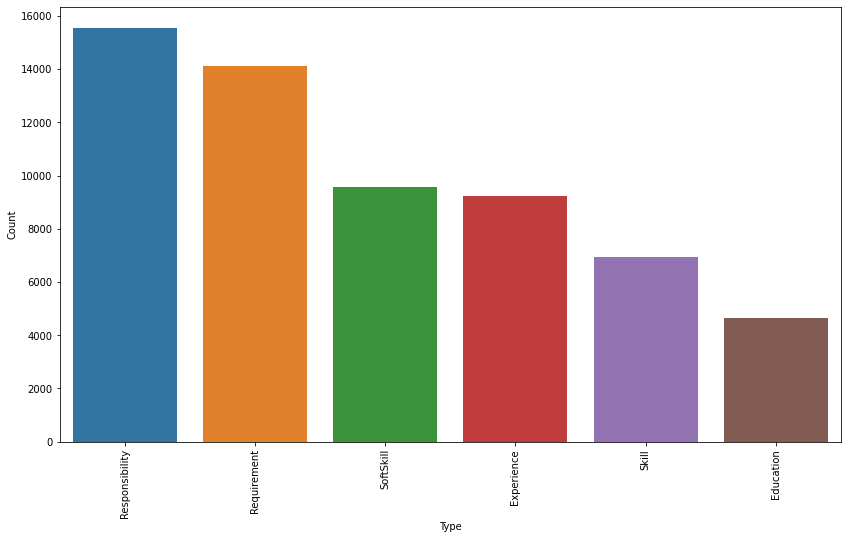

In [140]:
plt.figure(figsize=(14,8))
freq = df_merged.Type.value_counts()
sns.barplot(x=freq.index, y=freq)
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [141]:
df_merged['Type'].value_counts()

Responsibility    15561
Requirement       14132
SoftSkill          9581
Experience         9248
Skill              6956
Education          4637
Name: Type, dtype: int64

In [142]:
len(df_merged)

75144

Stop words removal process begines.

In [143]:
# Reference: https://www.kaggle.com/code/devashishpandit/naive-bayes-on-news-category-dataset
print(", ".join(stopwords.words('english')))
common_woards = set(stopwords.words('english'))

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [144]:
# Reference: https://www.kaggle.com/code/devashishpandit/naive-bayes-on-news-category-dataset
def preprocessing(statement):
    statement = " ".join([word for word in str(statement).split() 
    if word not in common_woards]) # removing stopwords
    statement = re.sub(r'[^A-Za-z0-9 ]+', '', statement)
    return statement

In [145]:
# Reference: https://www.kaggle.com/code/devashishpandit/naive-bayes-on-news-category-dataset
df_merged['new_sentence'] = df_merged['New_Sentence'].apply(preprocessing)

In [178]:
df_merged.head(10)

,Unnamed: 0,Sentence_id,New_Sentence,Type,new_sentence
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility,Author andor Review architecturedesign technic...
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility,Should able develop custom dynamic shape objec...
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement,Experience working crosslly larger Engineering...
3,3,GERSKL27235,"Previous business experience, including but no...",Skill,Previous business experience including limited...
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill,Delivering fast right first time
5,5,INDRES9494,Track department expenses and capital budget .,Responsibility,Track department expenses capital budget
6,6,HONRES51852,Meet performance metrics.,Responsibility,Meet performance metrics
7,7,UAEREQ34683,YOU MUST HAVEBachelors degree in Engineering.,Requirement,YOU MUST HAVEBachelors degree Engineering
8,8,UAEREQ4612,After COVID-19: Ability to travel to manufactu...,Requirement,After COVID19 Ability travel manufacturing sit...
9,9,INDEDU42721,Six Sigma qualification to at least Green Bel...,Education,Six Sigma qualification least Green Belt level


New colomn added to the dataset named as "new_sentence".

Division of data into train, validate and test.

In [149]:
# Dividing into "train, validate and test".
train, validate, test_df = \
            np.split(df_merged.sample(frac=1, 
                                      random_state=42), 
                     [int(.6*len(df_merged)), 
                      int(.8*len(df_merged))])
print("Following are the number of senetences in each entity/part.")
print("Number of sentences in train ::"+ str({len(train)}))
print("Number of sentences in validate ::"+ str({len(validate)}))
print("Number of sentences in test ::"+ str({len(test_df)}))
print("Number of sentences in entier dataset ::"+ str({len(df_merged)}))

Following are the number of senetences in each entity/part.
Number of sentences in train ::{45086}
Number of sentences in validate ::{15029}
Number of sentences in test ::{15029}
Number of sentences in entier dataset ::{75144}


In [150]:
train

,Unnamed: 0,Sentence_id,New_Sentence,Type,new_sentence
49580,49580,INDREQ51533,FL State Fire Alarm License holder (or willin...,Requirement,FL State Fire Alarm License holder or willing ...
30165,30165,COGREQ5006,Experience on operational process change woul...,Requirement,Experience operational process change would ad...
13977,13977,COGSKL16289,The DBA must have cloud knowledge to manage da...,Skill,The DBA must cloud knowledge manage databases ...
8546,8546,INDRES13026,You enjoy being involved in a wide range of pr...,Responsibility,You enjoy involved wide range projects area SA...
18571,18571,GERRES49418,The CSE I typically supports other senior CSEs...,Responsibility,The CSE I typically supports senior CSEs field...
...,...,...,...,...,...
17232,17232,INDREQ42417,Strong experience of working with senior & C-...,Requirement,Strong experience working senior Csuite roles
30367,30367,GERSSK12297,Sie rzeugen durch Ihre kommunikativen Fgkeiten...,SoftSkill,Sie rzeugen durch Ihre kommunikativen Fgkeiten...
55971,55971,GERREQ1230,WE VALUEExtensive experience in procurement.,Requirement,WE VALUEExtensive experience procurement
74472,14357,COGRES46047,Promote a Strong Safety Culture.,NaN,Promote Strong Safety Culture


In [151]:
train.isna().sum()

Unnamed: 0         0
Sentence_id        0
New_Sentence     848
Type            8955
new_sentence       0
dtype: int64

In [152]:
len(train)

45086

In [153]:
train['Type'].value_counts()

Responsibility    9409
Requirement       8532
SoftSkill         5726
Experience        5502
Skill             4180
Education         2782
Name: Type, dtype: int64

In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45086 entries, 49580 to 42855
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    45086 non-null  int64 
 1   Sentence_id   45086 non-null  object
 2   New_Sentence  44238 non-null  object
 3   Type          36131 non-null  object
 4   new_sentence  45086 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


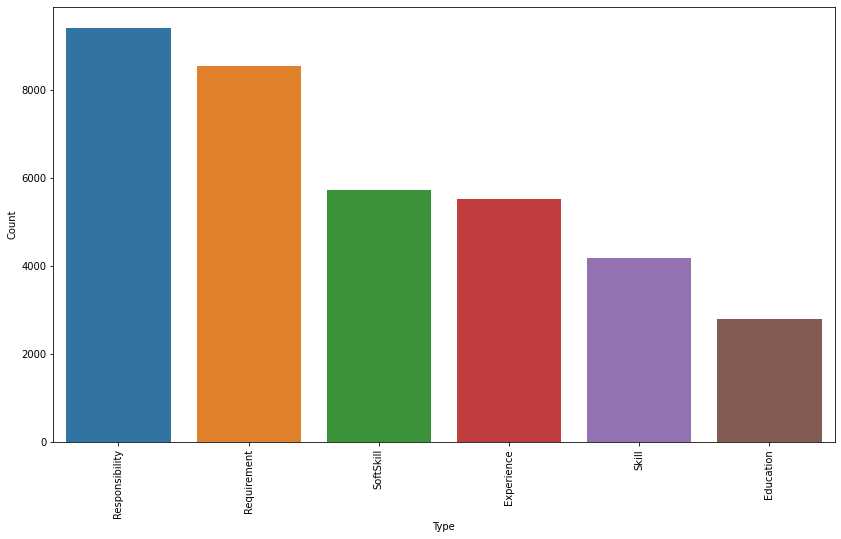

In [172]:
import seaborn as sns
plt.figure(figsize=(14,8))
count = train.Type.value_counts()
sns.barplot(x = count.index, y = count)
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [157]:
# Dictionary of all the words and the occurences of the words.
def word_occurences(data_set) -> list:
  words_in_row = dict()
  for j in range(len(data_set)):
    ln = data_set['new_sentence'] # New column without stopwords
    ln = ln.to_string()
    ln = ln.strip()
    ln = ln.lower()
    wrds = ln.split(' ')
    for word in wrds:
        if word in words_in_row:
              words_in_row[word] = words_in_row[word] + 1 # We increment an say, imaginary book for handling zero value.
        else:
              words_in_row[word] = 1  
    for i in list(words_in_row.keys()):
      if words_in_row[i] < 5:
        del words_in_row[i] 
    return (words_in_row)
vocab = word_occurences(train)
print(vocab)

{'': 411225, 'state': 26, 'fire': 48, 'alarm': 25, 'license': 23, 'holder': 12, 'or': 73, 'willing': 100, 'experience': 8600, 'operational': 90, 'process': 542, 'change': 174, 'would': 70, 'the': 729, 'dba': 12, 'must': 1416, 'cloud': 232, 'knowledge': 2002, 'manage': 568, 'databases': 43, 'you': 1250, 'enjoy': 16, 'involved': 34, 'wide': 29, 'range': 38, 'projects': 342, 'area': 51, 'cse': 5, 'i': 10, 'typically': 6, 'supports': 38, 'senior': 208, '8': 325, 'years': 5401, 'timely': 88, 'pos': 7, 'vendors': 20, 'followup': 14, 'order': 87, 'expertise': 262, 'algorithm': 6, 'development': 908, 'indepth': 57, 'candidate': 378, 'graduated': 12, 'since': 5, 'may': 131, '2021': 5, 'strong': 1903, 'handson': 269, 'database': 110, 'technology': 313, 'implement': 174, 'spot': 5, 'jobs': 15, 'hardware': 120, 'software': 695, '5': 1315, 'working': 1228, 'selling': 89, 'complex': 362, 'responsibilities': 98, 'include': 121, 'managing': 352, 'marketo': 9, 'bachelors': 1277, 'degree': 2383, 'comput

In [167]:
# Conditional occurences of the words for every label 
import re
types = df_merged['Type'].unique()
def conditional_count_values(dataset,label):  
  word_count = {}
  for cat in types:
    word_dictionary = {}
    dt = df_merged[df_merged[label] == cat]['new_sentence'] # New colomn conataining no stop words
    for row in dt:
      wrd = list(set(re.split("[^a-zA-Z]",str(row))))
      for word in wrd:
        word = word.lower()
        if word in word_dictionary:
          word_dictionary[word] = word_dictionary[word]+1
        else:
          word_dictionary[word] = 1
    for word, count in dict(word_dictionary).items():
      if (len(word)<3) or (count<4):
        word_dictionary.pop(word)
    word_count[cat] = word_dictionary
  return pd.DataFrame(word_count).fillna(0)

In [159]:
# Returns the probability of the word with total number of occurances.
def probability_of_word_in_all_documents(dataset,word_given,smoothing):
  return((word_occurences(dataset)[word_given] 
          + smoothing )/(len(dataset) 
          + (len(dataset['Type'].unique()) 
          * smoothing)))

In [160]:
# Conditional Probability
def conditional_probability(dataset,word,category,smoothing):
  conditional_value_dataframe = conditional_count_values(train,'Type')
  probability_value = (conditional_value_dataframe.loc[word,category])*smoothing / ((conditional_value_dataframe[category].sum()) 
  + (smoothing 
     * len(conditional_value_dataframe[category])))
  return probability_value

In [161]:
def count_probability_class(category_set):
  result_probabilty = category_set.groupby('Type').size().div(len(category_set)) 
  return(result_probabilty)

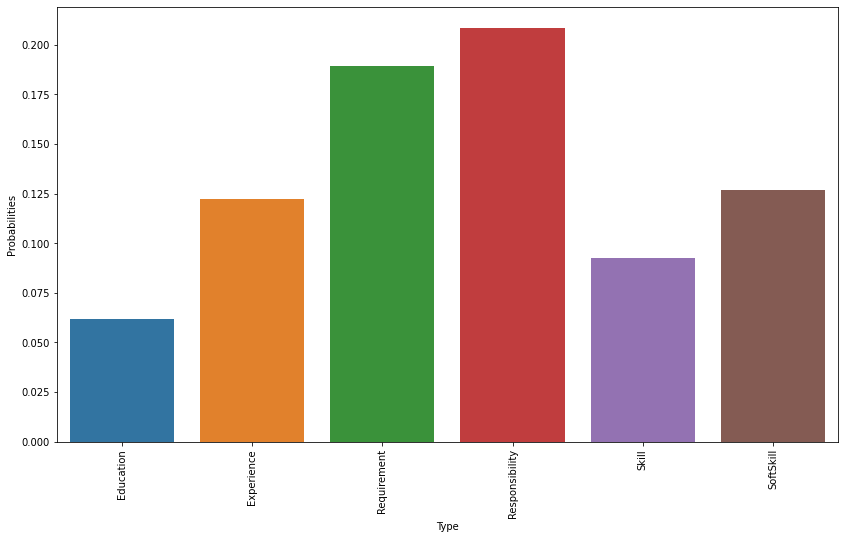

In [169]:
result_prob = train.groupby('Type').size().div(len(train))
plt.figure(figsize=(14,8))
sns.barplot(x = result_prob.index, y = result_prob)
plt.xlabel('Type')
plt.ylabel('Chances')
plt.xticks(rotation=90);
plt.show()

In [163]:
def naive_bayes_prob(word,data,category,smoothing):
  final_prob = conditional_probability(data,word,category,smoothing) * count_probability_class(data)
  return final_prob[category]

Training the set

In [170]:
vocab_train = word_occurences(train)
cond_words_train = conditional_count_values(train,'new_sentence')
cond_words_train.dropna()

,Responsibility,Requirement,Skill,SoftSkill,Education,Experience,NaN


In [165]:
probability_of_word_in_all_documents(train,"systems",1)  

0.010467256558667643

In [168]:
laplace_values = [1, 0.1, 0.5]
max_conditional_prob = 0
for i in laplace_values:
  print(f"When smoothing factor = {i} : ",conditional_probability(train,"business",'Responsibility',i))
  if max_conditional_prob < conditional_probability(train,"business",'Responsibility',i):
    max_conditional_prob = conditional_probability(train,"business",'Responsibility',i)
print(f"Max Conditional Probality: {max_conditional_prob}")

When smoothing factor = 1 :  0.010952140197900183
When smoothing factor = 0.1 :  0.0011304527571729193
When smoothing factor = 0.5 :  0.005572575445254792
Max Conditional Probality: 0.010952140197900183


In [112]:
class_train_probability = count_probability_class(train)

In [175]:
naive_bayes_prob("business",train,'Responsibility',1)

0.002285602784058085

In [176]:
naive_bayes_prob("business",train,'Responsibility',0.1)

0.00023591425258927376

Occurence in every Type.

In [177]:
counter = 6
for i in df_merged['Type'].unique():
  print(naive_bayes_prob("business",df_merged, i, 0.1))
  counter -= 1
  if counter == 0:
    break

0.00023409687206387466
0.0001487965213375523
6.033970827819431e-05
0.00010803407685607194
0.00012323838792386384
8.895631645850272e-05


In [116]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [117]:
for train,validate in cv.split(df):
  print("Train Score = ",train,"Validation Score : ",validate)

Train Score =  [    0     1     2 ... 60112 60113 60114] Validation Score :  [   10    12    28 ... 60096 60099 60109]
Train Score =  [    0     1     4 ... 60112 60113 60114] Validation Score :  [    2     3     8 ... 60091 60094 60103]
Train Score =  [    1     2     3 ... 60110 60113 60114] Validation Score :  [    0    21    22 ... 60108 60111 60112]
Train Score =  [    0     2     3 ... 60112 60113 60114] Validation Score :  [    1     4     5 ... 60105 60106 60110]
Train Score =  [    0     1     2 ... 60110 60111 60112] Validation Score :  [    9    14    15 ... 60104 60113 60114]


Testing...

In [118]:
vocab_test = word_occurences(test_df)
cond_words_test = conditional_count_values(test_df,'Type')
cond_words_test.dropna()

,Responsibility,Requirement,Skill,SoftSkill,Education,Experience,NaN
deliverables,103.0,27.0,5.0,16.0,0.0,9.0,0.0
technical,885.0,501.0,213.0,247.0,264.0,415.0,0.0
across,427.0,175.0,48.0,160.0,14.0,55.0,0.0
andor,175.0,178.0,117.0,21.0,95.0,362.0,0.0
quality,617.0,145.0,84.0,69.0,26.0,154.0,0.0
...,...,...,...,...,...,...,...
technicalbusiness,0.0,0.0,0.0,0.0,0.0,4.0,0.0
airflow,0.0,0.0,0.0,0.0,0.0,4.0,0.0
experienceminimum,0.0,0.0,0.0,0.0,0.0,4.0,0.0
marts,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [179]:
laplace_values = [1, 0.1, 0.5]
max_conditional_prob = 0
cond_probs = []
for i in laplace_values:
  print(f"When smoothing factor = {i} : ",conditional_probability(test_df,"department",'Responsibility',i))
  cond_probs.append(conditional_probability(test_df,"department",'Responsibility',i))
  if max_conditional_prob < conditional_probability(test_df,"department",'Responsibility',i):
    max_conditional_prob = conditional_probability(test_df,"department",'Responsibility',i)
print(f"Max Conditional Probality: {max_conditional_prob}")

When smoothing factor = 1 :  0.00043335806538453964
When smoothing factor = 0.1 :  4.4730145067993215e-05
When smoothing factor = 0.5 :  0.0002204975895604414
Max Conditional Probality: 0.00043335806538453964


In [180]:
class_test_probability = count_probability_class(test_df)
class_test_probability

Type
Education         0.062546
Experience        0.127487
Requirement       0.186306
Responsibility    0.204871
Skill             0.093419
SoftSkill         0.127820
dtype: float64

In [181]:
naive_bayes_prob("department",test_df,'Responsibility',1)

8.878231973644272e-05

Occurences in every class.

In [182]:
counter = 6
for i in df_merged['Type'].unique():
  print(naive_bayes_prob("department",df_merged, i, 0.1))
  counter -= 1
  if counter == 0:
    break

9.262825873031013e-06
8.007822800393926e-06
1.1174020051517462e-06
0.0
0.0
1.9037343989173735e-06
